<a href="https://colab.research.google.com/github/yongug/Fly_python/blob/main/5_skt_fly_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install ucimlrepo
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
data = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=column_names, na_values="?")
data

In [32]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
auto_mpg = fetch_ucirepo(id=9)

# data (as pandas dataframes)
X = auto_mpg.data.features
y = auto_mpg.data.targets

# metadata
print(auto_mpg.metadata)

# variable information
print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

In [33]:
auto_mpg.data

{'ids':                       car_name
 0    chevrolet,chevelle,malibu
 1            buick,skylark,320
 2           plymouth,satellite
 3                amc,rebel,sst
 4                  ford,torino
 ..                         ...
 393            ford,mustang,gl
 394                  vw,pickup
 395              dodge,rampage
 396                ford,ranger
 397                 chevy,s-10
 
 [398 rows x 1 columns],
 'features':      displacement  cylinders  horsepower  weight  acceleration  model_year  \
 0           307.0          8       130.0    3504          12.0          70   
 1           350.0          8       165.0    3693          11.5          70   
 2           318.0          8       150.0    3436          11.0          70   
 3           304.0          8       150.0    3433          12.0          70   
 4           302.0          8       140.0    3449          10.5          70   
 ..            ...        ...         ...     ...           ...         ...   
 393         140.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Create an imputer to fill missing values (NaN) with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your feature matrix X and transform it
X_imputed = imputer.fit_transform(X)

# Now, create and fit your linear regression model using the imputed data
line_filter = LinearRegression()
line_filter.fit(X_imputed, y)  # Use X_imputed instead of X

LinearRegression()

In [36]:
y_predicted = line_filter.predict(X_imputed)

In [37]:
auto_mpg

{'data': {'ids':                       car_name
  0    chevrolet,chevelle,malibu
  1            buick,skylark,320
  2           plymouth,satellite
  3                amc,rebel,sst
  4                  ford,torino
  ..                         ...
  393            ford,mustang,gl
  394                  vw,pickup
  395              dodge,rampage
  396                ford,ranger
  397                 chevy,s-10
  
  [398 rows x 1 columns],
  'features':      displacement  cylinders  horsepower  weight  acceleration  model_year  \
  0           307.0          8       130.0    3504          12.0          70   
  1           350.0          8       165.0    3693          11.5          70   
  2           318.0          8       150.0    3436          11.0          70   
  3           304.0          8       150.0    3433          12.0          70   
  4           302.0          8       140.0    3449          10.5          70   
  ..            ...        ...         ...     ...           ...    

In [38]:
features = auto_mpg.data.features
features

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1
394,97.0,4,52.0,2130,24.6,82,2
395,135.0,4,84.0,2295,11.6,82,1
396,120.0,4,79.0,2625,18.6,82,1


In [39]:
y = auto_mpg.data.targets

In [40]:
X = features['model_year']
X

0      70
1      70
2      70
3      70
4      70
       ..
393    82
394    82
395    82
396    82
397    82
Name: model_year, Length: 398, dtype: int64

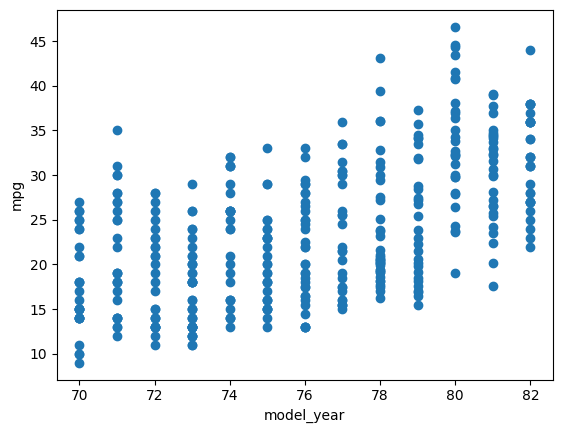

In [41]:
plt.plot(X, y, 'o')
plt.xlabel('model_year')
plt.ylabel('mpg')
plt.show()

In [42]:
line_filter = LinearRegression()
line_filter.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [43]:
line_filter.predict([[72]])

array([[18.60448432]])

In [44]:
line_filter.coef_

array([[1.22444564]])

In [45]:
line_filter.intercept_

array([-69.55560174])

<function matplotlib.pyplot.show(close=None, block=None)>

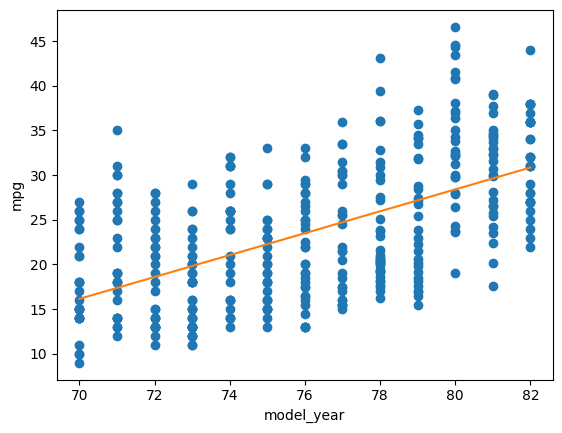

In [46]:
plt.plot(X,y,'o')
plt.plot(X, line_filter.predict(X.values.reshape(-1, 1)))
plt.xlabel('model_year')
plt.ylabel('mpg')
plt.show

In [47]:
X = features['weight']
X

0      3504
1      3693
2      3436
3      3433
4      3449
       ... 
393    2790
394    2130
395    2295
396    2625
397    2720
Name: weight, Length: 398, dtype: int64

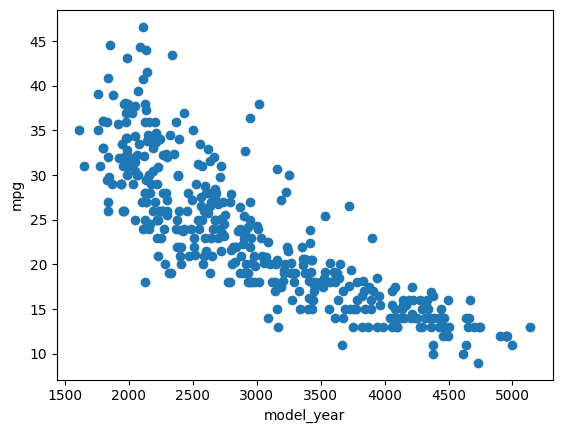

In [48]:
plt.plot(X, y, 'o')
plt.xlabel('model_year')
plt.ylabel('mpg')
plt.show()

In [49]:
line_filter = LinearRegression()
line_filter.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [50]:
line_filter.coef_

array([[-0.00767661]])

<function matplotlib.pyplot.show(close=None, block=None)>

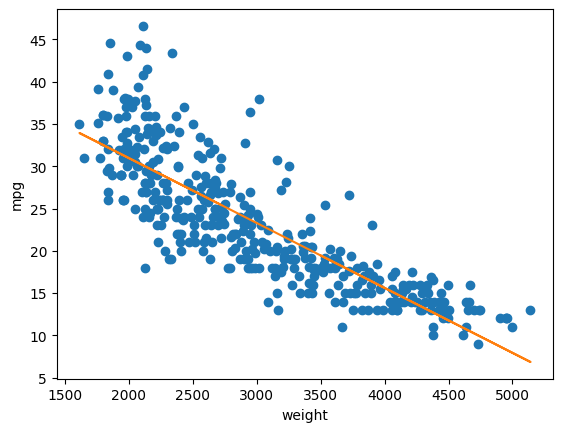

In [51]:
plt.plot(X,y,'o')
plt.plot(X, line_filter.predict(X.values.reshape(-1, 1)))
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show

In [6]:
print('hi')

hi


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# CSV 파일 불러오기
# train_path = '/mnt/data/car5_train.csv'
# test_path = '/mnt/data/car5_test.csv'

train_data = pd.read_csv('./car5_train.csv')
test_data = pd.read_csv('./car5_test.csv')

  # typeofoil이 2인 데이터만 필터링
train_data_filtered = train_data[train_data['typeofoil'] == 2]
test_data_filtered = test_data[test_data['typeofoil'] == 2]

# 피처와 타겟 분리
X_train = train_data_filtered[['CO2', 'fuel_efficiency', 'displacement']]
y_train = train_data_filtered['grade']

X_test = test_data_filtered[['CO2', 'fuel_efficiency', 'displacement']]
y_test = test_data_filtered['grade']

# 다중 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 결과 시각화
plt.scatter(y_test, y_pred, color='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linewidth=2)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs Predicted Grade')
plt.show()


KeyError: 'grade'

Mean Squared Error: 0.0014289919777925638
R^2 Score: 0.992378709451773


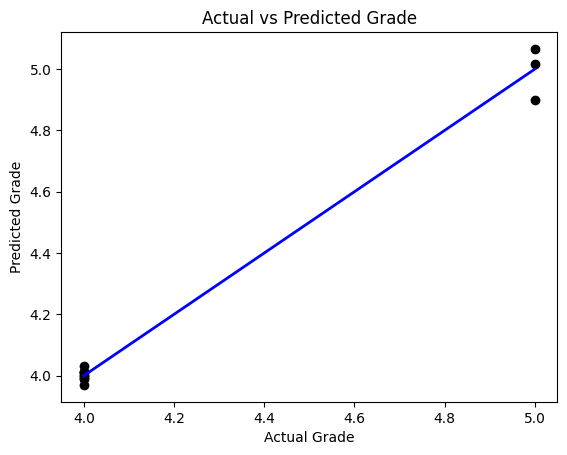

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

train_data = pd.read_csv('./car5_train.csv')

# typeofoil이 2인 데이터만 필터링
train_data_filtered = train_data[train_data['typeofoil'] == 2]

# 피처와 타겟 분리
X_train = train_data_filtered[['CO2', 'fuel_efficiency', 'displacement']]
y_train = train_data_filtered['grade']

# 다중 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_train)

# 모델 평가
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# 결과 시각화
plt.scatter(y_train, y_pred, color='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='blue', linewidth=2)
plt.xlabel('Actual Grade')
plt.ylabel('Predicted Grade')
plt.title('Actual vs Predicted Grade')
plt.show()


<ipython-input-13-eea4b664d9f1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_filtered['predicted_grade'] = y_pred_test


   CO2  fuel_efficiency  displacement  predicted_grade
7  131             10.0          1999         4.040876


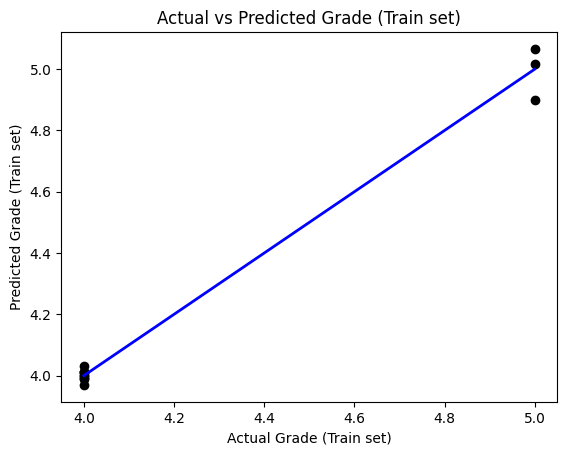

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# CSV 파일 불러오기


train_data = pd.read_csv('./car5_train.csv')
test_data = pd.read_csv('./car5_test.csv')

# typeofoil이 2인 데이터만 필터링
train_data_filtered = train_data[train_data['typeofoil'] == 2]
test_data_filtered = test_data[test_data['typeofoil'] == 2]

# 피처와 타겟 분리 (train set)
X_train = train_data_filtered[['CO2', 'fuel_efficiency', 'displacement']]
y_train = train_data_filtered['grade']

# 피처 분리 (test set)
X_test = test_data_filtered[['CO2', 'fuel_efficiency', 'displacement']]

# 다중 회귀 모델 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 세트에 대한 예측
y_pred_test = model.predict(X_test)

# 예측 값 출력
test_data_filtered['predicted_grade'] = y_pred_test

# 예측 결과 확인
print(test_data_filtered[['CO2', 'fuel_efficiency', 'displacement', 'predicted_grade']])

# 트레인 데이터에 대한 예측 (시각화를 위해)
y_pred_train = model.predict(X_train)

# 결과 시각화 (Train set)
plt.scatter(y_train, y_pred_train, color='black')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='blue', linewidth=2)
plt.xlabel('Actual Grade (Train set)')
plt.ylabel('Predicted Grade (Train set)')
plt.title('Actual vs Predicted Grade (Train set)')
plt.show()


In [24]:
# 필요한 라이브러리 설치
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import io

# 업로드한 파일 읽기
# df = pd.read_excel(io.BytesIO(uploaded['processed_digital_literacy_data.xlsx']))

df = pd.read_csv('./disabled_data.csv')
# 데이터 확인
df.head()


,ID,TYP,Q1A1,Q1A2,Q2A11,Q2A12,Q2A13,Q2A2,Q2A3,Q3,...,CDQ13A5,CDQ13A6,CDQ13A7,CDQ13A8,CDQ14,CDQ15,CDQ161,CDQ162,CDQ163,WT_T
0,303577,3,1,1,1,,,1,1,1,...,,,,,2,5,11,2,2,0.090909
1,304824,3,1,1,1,,,1,1,1,...,,,,,2,1,12,2,2,0.090909
2,303454,3,1,1,1,,,1,2,1,...,,,,,2,3,8,1,1,0.066667
3,314979,3,1,1,1,,,1,2,1,...,,,,,2,1,8,2,2,0.066667
4,312878,3,1,1,1,,,1,2,1,...,,,,,2,2,11,2,2,0.090909


In [25]:
# 결측값 처리 (필요 시)
df = df.dropna()

# 피처와 타겟 변수 설정
X = df[['Q1A1', 'Q1A2', 'Q2A11', 'Q3', 'Q4A1']]
y = df['Q29A01']

# 문자열 데이터를 숫자로 변환
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 다시 결측값 처리 (평균으로 대체)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.583680484316902
R^2 Score: 0.649866944611843


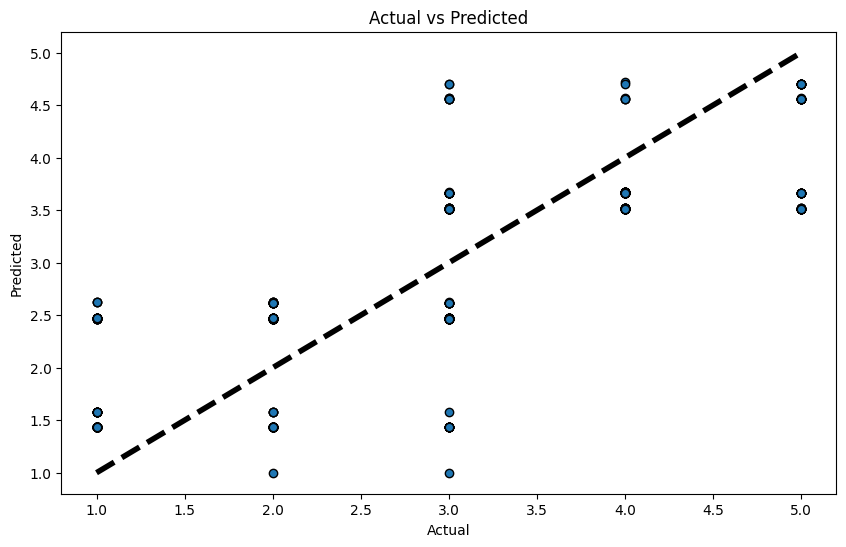

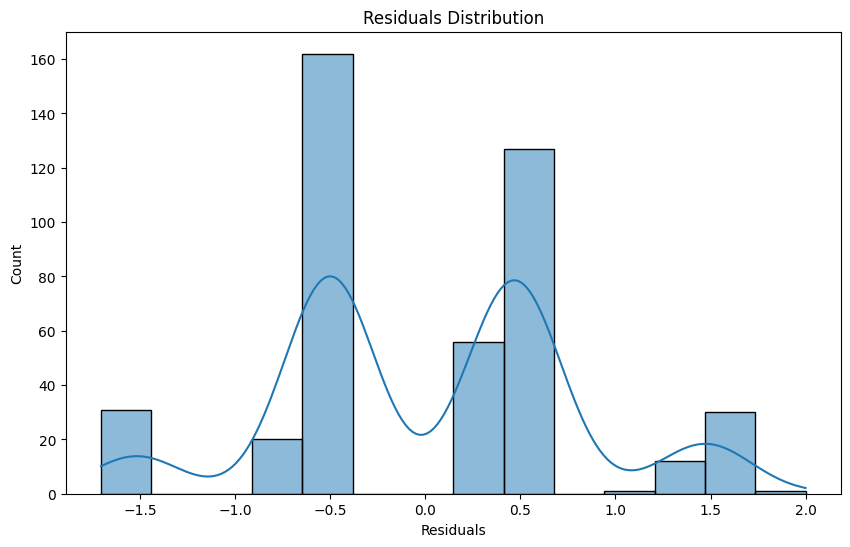

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 값 vs 예측 값
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()


In [28]:
# 필요한 라이브러리 설치
!pip install pandas scikit-learn matplotlib seaborn

import pandas as pd
import io

# 업로드한 파일 읽기
# df = pd.read_excel(io.BytesIO(uploaded['processed_digital_literacy_data.xlsx']))

df = pd.read_csv('./disabled_data.csv')
# 데이터 확인
df.head()


,ID,TYP,Q1A1,Q1A2,Q2A11,Q2A12,Q2A13,Q2A2,Q2A3,Q3,...,CDQ13A5,CDQ13A6,CDQ13A7,CDQ13A8,CDQ14,CDQ15,CDQ161,CDQ162,CDQ163,WT_T
0,303577,3,1,1,1,,,1,1,1,...,,,,,2,5,11,2,2,0.090909
1,304824,3,1,1,1,,,1,1,1,...,,,,,2,1,12,2,2,0.090909
2,303454,3,1,1,1,,,1,2,1,...,,,,,2,3,8,1,1,0.066667
3,314979,3,1,1,1,,,1,2,1,...,,,,,2,1,8,2,2,0.066667
4,312878,3,1,1,1,,,1,2,1,...,,,,,2,2,11,2,2,0.090909


In [29]:
# 결측값 처리 (필요 시)
df = df.dropna()

# 피처와 타겟 변수 설정
X = df[['Q17A1', 'Q17A2', 'Q17A3', 'Q17A4', 'Q18A1']]
y = df['Q29A01']


# 문자열 데이터를 숫자로 변환
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# 다시 결측값 처리 (평균으로 대체)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)


# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 모델 생성
model = LinearRegression()

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1.2343232586782749
R^2 Score: 0.2595651464970936


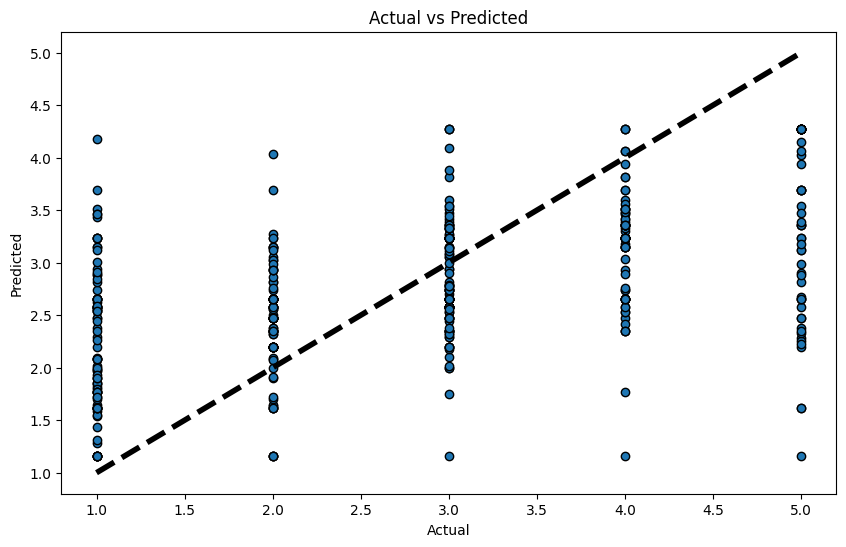

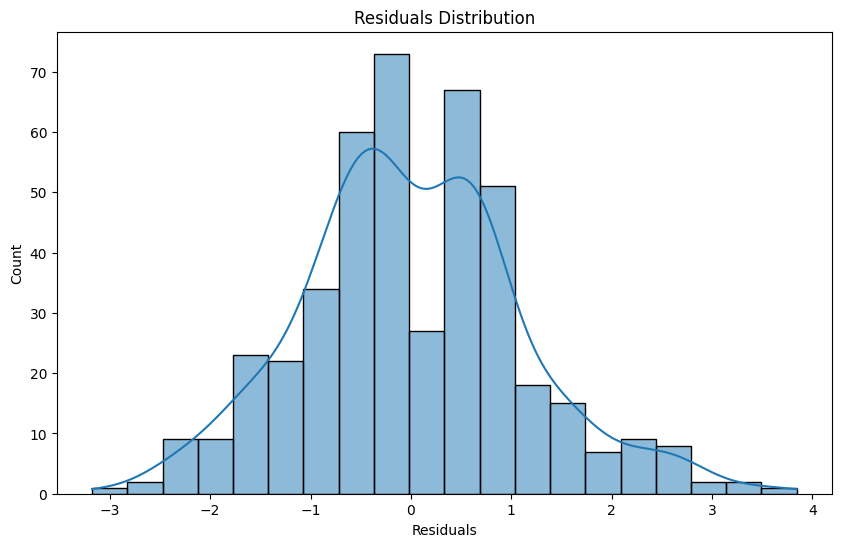

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 실제 값 vs 예측 값
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()
